# Extremal Goodhart

Extremal Goodhart happens when the relationship between the proxy and the goal differ in normal and extreme situations. Worlds in which the proxy takes an extreme value may be very different from the ordinary worlds in which the correlation between the proxy and the goal was observed.

## Model Insufficiency
Model Insufficiency - The proxy is based on a learned relationship between the goal and the proxy which is approximately accurate in the initial region. Selection pressure moves the proxy away from the region in which the relationship is most accurate so the relationship collapses.

In the case of model insufficiency, error is caused by model simplification and inaccuracy, not a fundamental issue with the ability to build a sufficiently accurate estimator. In other words, the model model is too simple to capture the relationship between the proxy and the goal.

### Example
Suppose we're modeling the relationship between temperature and comfort. We only model the comfort for temperatures between 65 and 75 degrees Farenheit because of [CONTRIVED REASONS].

Text(0, 0.5, 'Comfort')

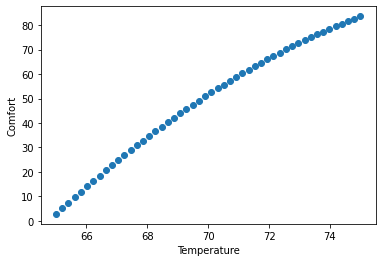

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_comfort(temp):
    return (-.338 * (temp**2)) + (55.4 * temp) - (2170.1)

temperatures = np.linspace(65, 75, num=50)
comfort = np.array([get_comfort(temp) for temp in temperatures])

plt.scatter(x=temperatures, y=comfort)
plt.xlabel('Temperature')
plt.ylabel('Comfort')

This looks pretty close to a straight line. Let's try fitting a linear model to it.

Text(0, 0.5, 'Comfort')

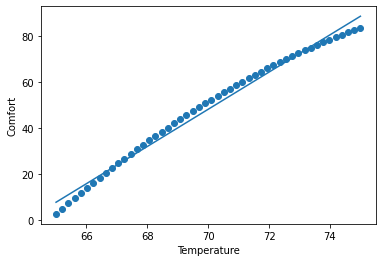

In [3]:
def get_expected_comfort(temp):
    return (8.08 * temp) - 517.28

expected_comfort = np.array([get_expected_comfort(temp) for temp in temperatures])
plt.scatter(x=temperatures, y=comfort)
plt.plot(temperatures, expected_comfort)
plt.xlabel('Temperature')
plt.ylabel('Comfort')

The line fits pretty well! Using our linear model, we'd think that to make people more comfortable, all we have to do is keep increasing the temperature. However, as we move away from the region in which we found this linear relationship, we find that the relationship collapses. Let's see what happens when we push our proxy to more extreme temperatures.

Text(0, 0.5, 'Comfort')

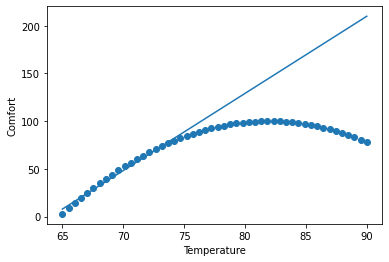

In [4]:
temperatures = np.linspace(65, 90, num=50)
comfort = np.array([get_comfort(temp) for temp in temperatures])
expected_comfort = np.array([get_expected_comfort(temp) for temp in temperatures])
plt.scatter(x=temperatures, y=comfort)
plt.plot(temperatures, expected_comfort)
plt.xlabel('Temperature')
plt.ylabel('Comfort')

We can see that our model was too simple to capture the true relationship between the proxy (temperature) and the goal (comfort). While it worked well in the initial region, once we went into more extreme regions it failed. If we had used a more complex model (perhaps quadratic), we would have been able to capture the true relationship between the proxy and the goal.

## Change in Regime
Change in Regime - The proxy may be related to the goal differently in different regions. Even if the correct relationship is learned for the observer region, in the region where the proxy takes an extreme value, the relationship to the goal may be fundamentally different. Selection based on the proxy moves into such a region.

### Example
Suppose we have a car with a speedometer. The speedometer displays a maximum speed of 100mph. We can graph the true speed vs the displayed speed.

Text(0, 0.5, 'Displayed Speed')

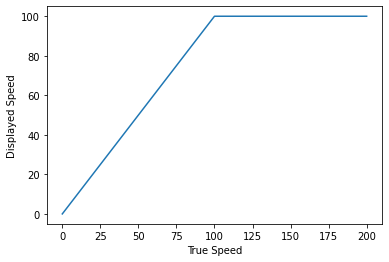

In [5]:
def speedometer(speed):
    return min(speed, 100)

true_speed = np.linspace(0, 200, num=1000)
displayed_speed = np.array([speedometer(speed) for speed in true_speed])
plt.plot(true_speed, displayed_speed)
plt.xlabel('True Speed')
plt.ylabel('Displayed Speed')

As you can see, the relationship between the proxy (displayed speed) and the goal (true speed) changes between regimes (usual driving speed vs extreme driving speeds).